# Fraud Detection

EDA on a fraud detection dataset, with statistical validation and actionable business insights.

#### 1) Importing Necessary Libraries:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Data Overview:

##### 1) Data Loading:

In [56]:
df= pd.read_csv('FraudDetection_final.csv')

In [57]:
df.head()

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,avg_transaction_amount,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud
0,1,4174,180.35,Online Purchase,2023-01-01 00:00:00,Mobile,Rural,Travel,1753.0,441,239.66,0,0,3.0,0,0
1,2,4507,105.99,ATM Withdrawal,2023-01-01 01:00:00,Desktop,Urban,Electronics,1654.0,260,75.80,0,0,2.0,0,0
2,3,1860,NaN,ATM Withdrawal,2023-01-01 02:00:00,Mobile,Suburban,Clothing,445.0,332,215.77,0,0,4.0,0,0
3,4,2294,NaN,Online Purchase,2023-01-01 03:00:00,Desktop,Urban,Electronics,348.0,231,180.20,0,0,NaN,0,0
4,5,2130,194.96,Online Purchase,2023-01-01 04:00:00,Mobile,Urban,Clothing,NaN,247,57.90,0,0,NaN,0,0


In [58]:
df.tail()

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,avg_transaction_amount,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud
7995,7996,2576,116.15,Online Purchase,2023-11-30 03:00:00,Tablet,Urban,Travel,308.0,473,34.12,0,0,2.0,0,0
7996,7997,1335,58.22,Online Purchase,2023-11-30 04:00:00,Mobile,Urban,NaN,803.0,195,176.79,0,0,4.0,0,0
7997,7998,3209,273.65,POS Purchase,2023-11-30 05:00:00,Mobile,Rural,Clothing,882.0,271,88.02,0,0,2.0,0,1
7998,7999,4231,201.13,Transfer,2023-11-30 06:00:00,Mobile,Urban,Clothing,1563.0,472,64.67,0,0,2.0,0,0
7999,8000,2497,296.15,Transfer,2023-11-30 07:00:00,Mobile,Urban,Electronics,460.0,466,43.79,0,0,NaN,0,0


##### 2) Data Overview:

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          8000 non-null   int64  
 1   customer_id             8000 non-null   int64  
 2   transaction_amount      7600 non-null   float64
 3   transaction_type        8000 non-null   object 
 4   transaction_time        8000 non-null   object 
 5   device_type             7840 non-null   object 
 6   location                8000 non-null   object 
 7   merchant_category       7760 non-null   object 
 8   account_age_days        7360 non-null   float64
 9   num_prev_transactions   8000 non-null   int64  
 10  avg_transaction_amount  8000 non-null   float64
 11  is_international        8000 non-null   int64  
 12  is_high_risk_country    8000 non-null   int64  
 13  failed_login_attempts   7200 non-null   float64
 14  card_present            8000 non-null   

As can be seen here,
- Several Columns, 'transaction_amount', 'device_type', 'merchant_category', 'account_age_days' and 'failed_login_attempts' have some Missing Values.
- 'transaction_time' column is stored as object datatype instead of datetime datatype.

###### Converting Transaction Time Column to Date-Time Data Type:

In [60]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          8000 non-null   int64         
 1   customer_id             8000 non-null   int64         
 2   transaction_amount      7600 non-null   float64       
 3   transaction_type        8000 non-null   object        
 4   transaction_time        8000 non-null   datetime64[ns]
 5   device_type             7840 non-null   object        
 6   location                8000 non-null   object        
 7   merchant_category       7760 non-null   object        
 8   account_age_days        7360 non-null   float64       
 9   num_prev_transactions   8000 non-null   int64         
 10  avg_transaction_amount  8000 non-null   float64       
 11  is_international        8000 non-null   int64         
 12  is_high_risk_country    8000 non-null   int64   

df.head()

In [62]:
df.shape

(8000, 16)

In Data, we have
- 16 Features (Columns) and 8000 Records.
- Some of the Columns have Missing Values, which we will handle in next Step.

#### 3) Data Cleaning:

##### 1) handling Missing Values:

In [63]:
# Number of Missing Values:

df.isnull().sum()

transaction_id              0
customer_id                 0
transaction_amount        400
transaction_type            0
transaction_time            0
device_type               160
location                    0
merchant_category         240
account_age_days          640
num_prev_transactions       0
avg_transaction_amount      0
is_international            0
is_high_risk_country        0
failed_login_attempts     800
card_present                0
fraud                       0
dtype: int64

In [64]:
# Percentage of Missing Values:

df.isnull().sum() / len(df) * 100

transaction_id             0.0
customer_id                0.0
transaction_amount         5.0
transaction_type           0.0
transaction_time           0.0
device_type                2.0
location                   0.0
merchant_category          3.0
account_age_days           8.0
num_prev_transactions      0.0
avg_transaction_amount     0.0
is_international           0.0
is_high_risk_country       0.0
failed_login_attempts     10.0
card_present               0.0
fraud                      0.0
dtype: float64

###### Transactrion Amount:

In [65]:
df['transaction_amount']

0       180.35
1       105.99
2          NaN
3          NaN
4       194.96
         ...  
7995    116.15
7996     58.22
7997    273.65
7998    201.13
7999    296.15
Name: transaction_amount, Length: 8000, dtype: float64

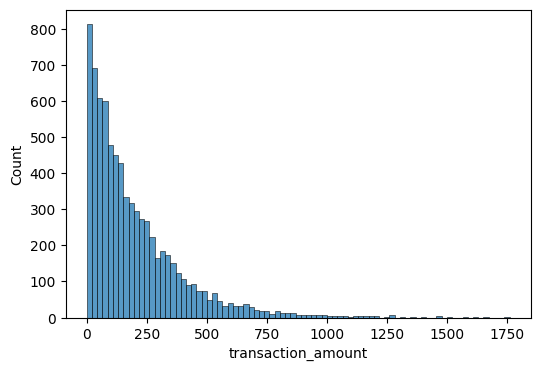

In [66]:
plt.figure(figsize= (6,4))
sns.histplot(data= df, x= 'transaction_amount')
plt.show()

In [67]:
df['transaction_amount'].describe()

count    7600.000000
mean      198.682061
std       200.271409
min         0.040000
25%        58.732500
50%       138.630000
75%       274.302500
max      1759.970000
Name: transaction_amount, dtype: float64

As we can see, Transaction Amount has Right Tailed Distribution.
Simplest method for Missing Value Imputation here would be Median Imputation.
As we have Average Transaction Amount For Each user too, We can Use that to Fill Missing Transaction Amounts too.

Strategy for Missing Value Imutation in Transaction Amount:
- Average Transaction Amount if Available,
- Group Median Considering Merchant Category and Device Type,
- Global Median.

In [68]:
def transaction_amount_imputation(row):
    """
    Imputes Missing Transaction Amount Based on:
    1) Average Transaction Amount if available or
    2) Group Median Considering Merchant Category and Device Type or
    3) Global Median
    """

    if not pd.isnull(row['transaction_amount']):
        return row['transaction_amount']

    if not pd.isnull(row['avg_transaction_amount']):
        return row['avg_transaction_amount']

    mask = (
        (df['merchant_category'] == row['merchant_category']) &
        (df['device_type'] == row['device_type'])
    )
    median_value = df.loc[mask, 'transaction_amount'].median()

    if not np.isnan(median_value):
        return median_value

    return df['trasaction_amount'].median()

In [69]:
df['transaction_amount'] = df.apply(transaction_amount_imputation, axis= 1)

In [70]:
df['transaction_amount'].isnull().sum()

0

###### Device Type:

In [71]:
df['device_type']

0        Mobile
1       Desktop
2        Mobile
3       Desktop
4        Mobile
         ...   
7995     Tablet
7996     Mobile
7997     Mobile
7998     Mobile
7999     Mobile
Name: device_type, Length: 8000, dtype: object

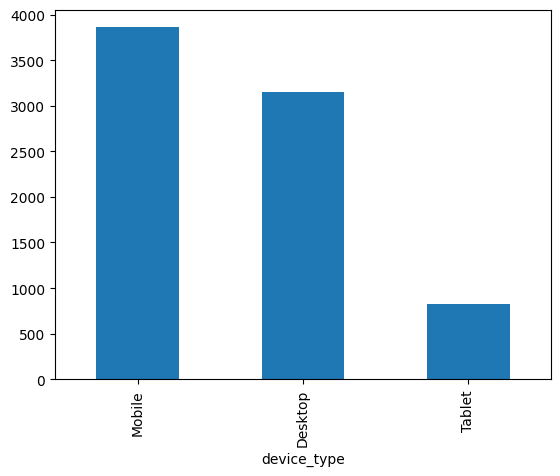

In [72]:
df['device_type'].value_counts().plot(kind= 'bar')
plt.show()

As Device Type is a Categorical Feature, Simplest Way of Missing Value Imputation is Mode Imputation.

Strategy For Missing Value imputation on Device Type:
- User Level Mode,
- Merchant Level Mode,
- Global Mode.

In [73]:
def device_type_imputation(df):
    """
    Imputes Missing Device Type Based on:
    1) User Level Mode or,
    2) Merchant Level Mode or,
    3) Global Mode
    """

    
    user_modes = df.groupby('customer_id')['device_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['device_type'] = df['device_type'].fillna(df['customer_id'].map(user_modes.to_dict()))
    
    # --- Step 2: Merchant-level mode ---
    if df['device_type'].isnull().sum() > 0:
        merchant_modes = df.groupby('merchant_category')['device_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        df['device_type'] = df['device_type'].fillna(df['merchant_category'].map(merchant_modes.to_dict()))
    
    # --- Step 3: Global mode ---
    if df['device_type'].isnull().sum() > 0:
        global_mode = df['device_type'].mode()[0]
        df['device_type'].fillna(global_mode, inplace=True)
    
    return df

In [74]:
df = device_type_imputation(df)

In [75]:
df['device_type'].isnull().sum()

0

###### Merchant Category:

In [76]:
df['merchant_category']

0            Travel
1       Electronics
2          Clothing
3       Electronics
4          Clothing
           ...     
7995         Travel
7996            NaN
7997       Clothing
7998       Clothing
7999    Electronics
Name: merchant_category, Length: 8000, dtype: object

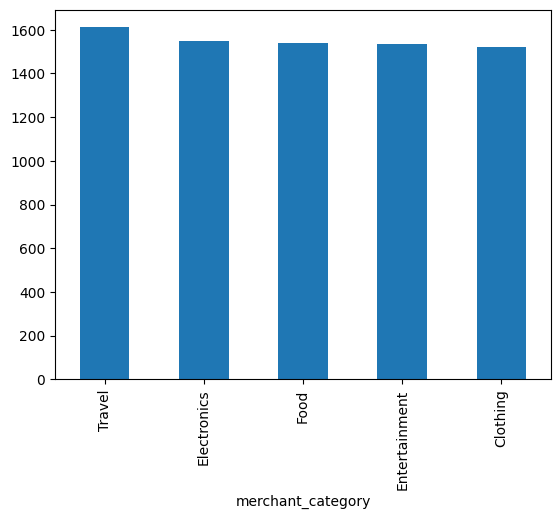

In [77]:
df['merchant_category'].value_counts().plot(kind= 'bar')
plt.show()

As we can see, Al Merchant Categories have almost similar number of occurances in Dataset.
- Simplest way to Impute Missing Values here would be to Use Mode of Merchant Category or Random Imputation.

Strategy used for Imputation:
- Mode of Merchant Category based on Grouping by Location and Device Type
- Mode based on Location
- Random Imputation.

In [78]:
def merchant_category_imputation(df):
    """
    Imputes Missing Merchant Category Based on:
    1) Mode of Merchant Category based on Grouping by Location and Device Type or
    2) Mode based on Location or
    3) Random Imputation.
    """

    df = df.copy()

    group_modes = df.groupby(['location','device_type'])['merchant_category'].apply(lambda x : x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
    df['merchant_category'] = df.apply(
        lambda row: group_modes.get((row['location'], row['device_type']), np.nan)
        if pd.isna(row['merchant_category']) else row['merchant_category'],
        axis=1
    )

    if df['merchant_category'].isnull().sum() > 0:
        location_modes = (
            df.groupby('location')['merchant_category']
            .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        )
        df['merchant_category'] = df['merchant_category'].fillna(
            df['location'].map(location_modes.to_dict()))

    if df['merchant_category'].isnull().sum() > 0:
        overall_dist = df['merchant_category'].value_counts(normalize=True)
        df['merchant_category'] = df['merchant_category'].apply(
            lambda x: np.random.choice(overall_dist.index, p=overall_dist.values) if pd.isna(x) else x)

    return df

In [79]:
df = merchant_category_imputation(df)

In [80]:
df['merchant_category'].isna().sum()

0

###### Account Age Days:

In [81]:
df['account_age_days']

0       1753.0
1       1654.0
2        445.0
3        348.0
4          NaN
         ...  
7995     308.0
7996     803.0
7997     882.0
7998    1563.0
7999     460.0
Name: account_age_days, Length: 8000, dtype: float64

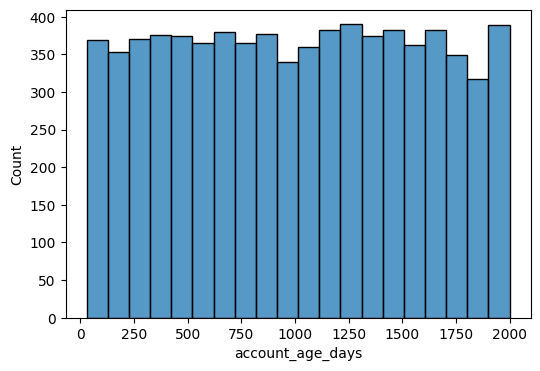

In [82]:
plt.figure(figsize= (6,4))
sns.histplot(data= df, x= 'account_age_days')
plt.show()

As Account Age Days has Uniform Distribution,
- Simplest way for Missing Value Imputation would be Mean Imputation.

Strategy for Missing Value Imputation in Account Age Days:
- Median Based on Customer
- Number of Previous Transaction Based Median
- Global Median.

In [83]:
def account_age_days_imputation(df):
    """
    Imputes Missing Account Age Days Based on:
    - Median Based on Customer or
    - Number of Previous Transaction Based Median or
    - Global Median.
    """

    df = df.copy()

    customer_medians = df.groupby('customer_id')['account_age_days'].median()
    df['account_age_days'] = df['account_age_days'].fillna(df['customer_id'].map(customer_medians.to_dict()))

    if df['account_age_days'].isnull().sum() > 0:

        # Bin customers by quartiles of previous transactions
        df['txn_bin'] = pd.qcut(df['num_prev_transactions'], q= 4, duplicates= 'drop')
        txn_bin_medians = df.groupby('txn_bin', observed= False)['account_age_days'].median()
        df['account_age_days'] = df.apply(lambda row :  txn_bin_medians[row['txn_bin']]
                                         if pd.isna(row['account_age_days']) else row['account_age_days'], axis= 1)

        df.drop(columns= ['txn_bin'], inplace= True)

    if df['account_age_days'].isnull().sum() > 0:
        global_median = df['account_age_days'].median()
        df['account_age_days'] = df['account_age_days'].fillna(global_median)

    return df

In [84]:
df = account_age_days_imputation(df)

In [85]:
df['account_age_days'].isna().sum()

0

###### Failed Login Attempts:

In [86]:
df['failed_login_attempts']

0       3.0
1       2.0
2       4.0
3       NaN
4       NaN
       ... 
7995    2.0
7996    4.0
7997    2.0
7998    2.0
7999    NaN
Name: failed_login_attempts, Length: 8000, dtype: float64

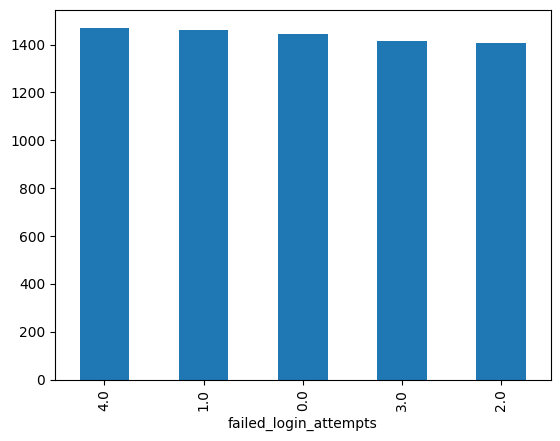

In [87]:
df['failed_login_attempts'].value_counts().plot(kind= 'bar')
plt.show()

In [88]:
print(df.groupby('device_type')['failed_login_attempts'].median())
print(df.groupby('location')['failed_login_attempts'].median())
print(df.groupby('is_international')['failed_login_attempts'].median())

device_type
Desktop    2.0
Mobile     2.0
Tablet     2.0
Name: failed_login_attempts, dtype: float64
location
Rural       2.0
Suburban    2.0
Urban       2.0
Name: failed_login_attempts, dtype: float64
is_international
0    2.0
1    2.0
Name: failed_login_attempts, dtype: float64


As we can see above, Failed Login Attempts has Unigorm Distribution and also Device Type, Location and International columns have same Medians for Failed Login Attempts, showing that they are not important factors for imputation here.

As all the values in Failed Login Attempts have Similar Likelihood of Occurance (Uniform Distribution), Random Imputation would be the Best Strategy Here.

In [89]:
# Getting The Non-missing Values From The 'failed_login_attempts' Column:
existing_values = df['failed_login_attempts'].dropna().values

# Finding The Indexes of The Missing Values:
missing_indices = df[df['failed_login_attempts'].isnull()].index

# Generating Random Choices From The Existing Values:
random_values = np.random.choice(existing_values, size=len(missing_indices))

# Filling The Missing Values With The Random Values
df.loc[missing_indices, 'failed_login_attempts'] = random_values

In [90]:
df['failed_login_attempts'].isna().sum()

0

##### 2) Creating Year, Month, Day, Hour and Weekday Columns from Transaction Time Column

In [91]:
df['year'] = df['transaction_time'].dt.year
df['month'] = df['transaction_time'].dt.month
df['day'] = df['transaction_time'].dt.day
df['hour'] = df['transaction_time'].dt.hour
df['weekday'] = df['transaction_time'].dt.weekday

In [92]:
df.head()

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,...,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud,year,month,day,hour,weekday
0,1,4174,180.35,Online Purchase,2023-01-01 00:00:00,Mobile,Rural,Travel,1753.0,441,...,0,0,3.0,0,0,2023,1,1,0,6
1,2,4507,105.99,ATM Withdrawal,2023-01-01 01:00:00,Desktop,Urban,Electronics,1654.0,260,...,0,0,2.0,0,0,2023,1,1,1,6
2,3,1860,215.77,ATM Withdrawal,2023-01-01 02:00:00,Mobile,Suburban,Clothing,445.0,332,...,0,0,4.0,0,0,2023,1,1,2,6
3,4,2294,180.20,Online Purchase,2023-01-01 03:00:00,Desktop,Urban,Electronics,348.0,231,...,0,0,1.0,0,0,2023,1,1,3,6
4,5,2130,194.96,Online Purchase,2023-01-01 04:00:00,Mobile,Urban,Clothing,1042.5,247,...,0,0,4.0,0,0,2023,1,1,4,6


##### 3) Dropping Duplicates if any:

In [93]:
df.duplicated().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          8000 non-null   int64         
 1   customer_id             8000 non-null   int64         
 2   transaction_amount      8000 non-null   float64       
 3   transaction_type        8000 non-null   object        
 4   transaction_time        8000 non-null   datetime64[ns]
 5   device_type             8000 non-null   object        
 6   location                8000 non-null   object        
 7   merchant_category       8000 non-null   object        
 8   account_age_days        8000 non-null   float64       
 9   num_prev_transactions   8000 non-null   int64         
 10  avg_transaction_amount  8000 non-null   float64       
 11  is_international        8000 non-null   int64         
 12  is_high_risk_country    8000 non-null   int64   

#### 4) Univariate Analysis:

##### 1) Numeric Features:

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          8000 non-null   int64         
 1   customer_id             8000 non-null   int64         
 2   transaction_amount      8000 non-null   float64       
 3   transaction_type        8000 non-null   object        
 4   transaction_time        8000 non-null   datetime64[ns]
 5   device_type             8000 non-null   object        
 6   location                8000 non-null   object        
 7   merchant_category       8000 non-null   object        
 8   account_age_days        8000 non-null   float64       
 9   num_prev_transactions   8000 non-null   int64         
 10  avg_transaction_amount  8000 non-null   float64       
 11  is_international        8000 non-null   int64         
 12  is_high_risk_country    8000 non-null   int64   

In [96]:
df.head(7)

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,...,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud,year,month,day,hour,weekday
0,1,4174,180.35,Online Purchase,2023-01-01 00:00:00,Mobile,Rural,Travel,1753.0,441,...,0,0,3.0,0,0,2023,1,1,0,6
1,2,4507,105.99,ATM Withdrawal,2023-01-01 01:00:00,Desktop,Urban,Electronics,1654.0,260,...,0,0,2.0,0,0,2023,1,1,1,6
2,3,1860,215.77,ATM Withdrawal,2023-01-01 02:00:00,Mobile,Suburban,Clothing,445.0,332,...,0,0,4.0,0,0,2023,1,1,2,6
3,4,2294,180.20,Online Purchase,2023-01-01 03:00:00,Desktop,Urban,Electronics,348.0,231,...,0,0,1.0,0,0,2023,1,1,3,6
4,5,2130,194.96,Online Purchase,2023-01-01 04:00:00,Mobile,Urban,Clothing,1042.5,247,...,0,0,4.0,0,0,2023,1,1,4,6
5,6,2095,328.76,ATM Withdrawal,2023-01-01 05:00:00,Tablet,Suburban,Electronics,1719.0,254,...,0,0,2.0,0,0,2023,1,1,5,6
6,7,4772,369.05,Online Purchase,2023-01-01 06:00:00,Desktop,Urban,Clothing,1015.0,460,...,0,0,2.0,0,0,2023,1,1,6,6


As we can see above,
- transaction_id, customer_id may seem numerical feature, but they don't hold importance in analysis as they are unique in nature.
- is_internation, is_hight_risk_country, failed_login_attempts, card_present, fraud, hour, weekday have Numerical Datatype, but they are Categorical in nature.

In [97]:
num_cols = ['transaction_amount', 'account_age_days', 'num_prev_transactions',
           'avg_transaction_amount']

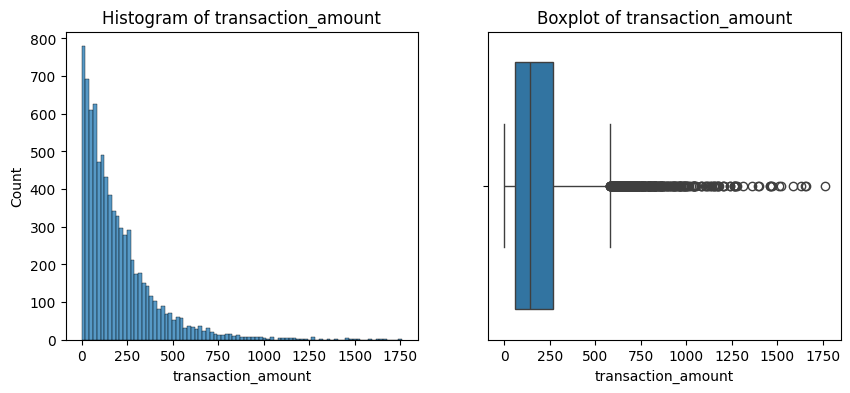

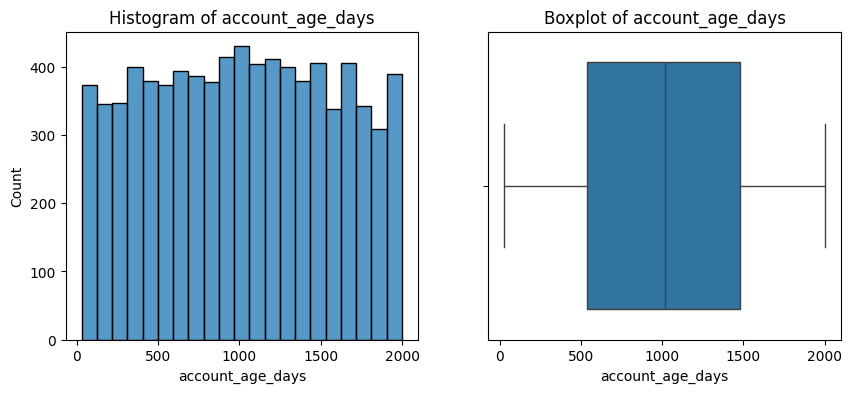

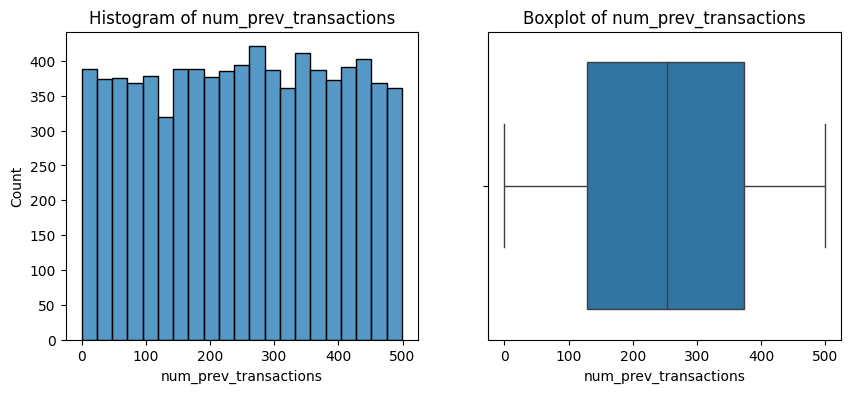

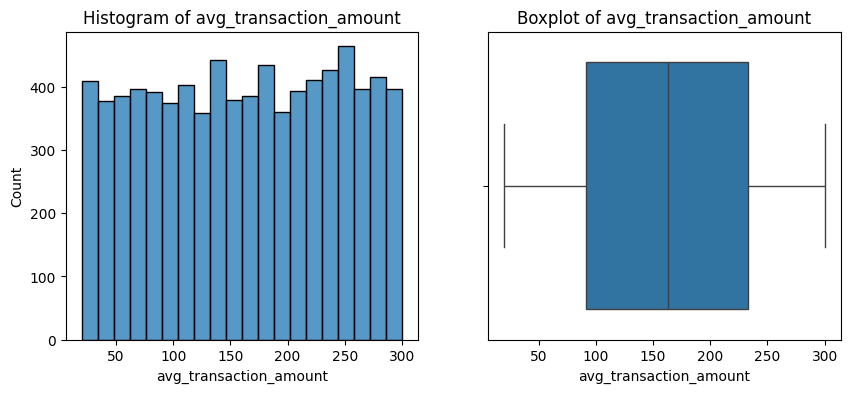

In [98]:
# Histogram and Boxplots of Numerical Features:

for feature in num_cols:

    fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (10,4))
    sns.histplot(data= df, x= feature, ax= axes[0])
    axes[0].set_title(f'Histogram of {feature}')
    axes[0].set_xlabel(feature)

    sns.boxplot(data= df, x= feature, ax= axes[1])
    axes[1].set_title(f'Boxplot of {feature}')
    axes[1].set_label(feature)

    plt.show()

Insights:

1) Transaction Amount:
   - Distribution is heavily right-skewed, meaning most transactions are of low amounts, with a few very high-value outliers.
   - The boxplot shows multiple extreme outliers, suggesting rare but very large payments.

Insight: High transaction amounts that fall far outside the typical range may indicate:
- Potential fraud attempts (e.g., large unauthorized purchases).
- Or legitimate premium transactions by a small group of users.
- These should be flagged for anomaly detection or threshold-based monitoring.

2) Account Age Days:
   - The distribution is nearly uniform — accounts are evenly spread from newly created to long-standing ones.
   - No visible outliers → dataset includes a balanced age profile.

Insight: Newer accounts (low account_age_days) are often riskier — fraudsters frequently create new accounts for quick misuse.
- Combine with transaction activity:
- New account + high transaction_amount = red flag.
- Old account + stable transaction patterns = lower risk.

3) Number of Previous Transactions:
- Fairly uniform distribution, with customers having a wide variety of previous transaction counts.
- No outliers — transaction histories are consistent.

Insight:
- Low previous transactions + high new transaction amount → potential fraud (inexperienced or fake account making big purchase).
- High previous transactions + stable behavior → likely legitimate user.

4) Average Transaction Amount:
    - Distribution is almost uniform, indicating diversity in spending habits.
    - No major outliers — average spend per user varies broadly but reasonably.

Insight: Sudden spike in a user’s average transaction amount compared to their past average can be a behavioral anomaly.

##### 2) Categorical Features:

In [99]:
df.head()

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,...,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud,year,month,day,hour,weekday
0,1,4174,180.35,Online Purchase,2023-01-01 00:00:00,Mobile,Rural,Travel,1753.0,441,...,0,0,3.0,0,0,2023,1,1,0,6
1,2,4507,105.99,ATM Withdrawal,2023-01-01 01:00:00,Desktop,Urban,Electronics,1654.0,260,...,0,0,2.0,0,0,2023,1,1,1,6
2,3,1860,215.77,ATM Withdrawal,2023-01-01 02:00:00,Mobile,Suburban,Clothing,445.0,332,...,0,0,4.0,0,0,2023,1,1,2,6
3,4,2294,180.20,Online Purchase,2023-01-01 03:00:00,Desktop,Urban,Electronics,348.0,231,...,0,0,1.0,0,0,2023,1,1,3,6
4,5,2130,194.96,Online Purchase,2023-01-01 04:00:00,Mobile,Urban,Clothing,1042.5,247,...,0,0,4.0,0,0,2023,1,1,4,6


As there are a lot of features that have Numerica Data but are Categorical in Nature, we will have to define Categorical Columns manually.

In [102]:
cat_cols = ['transaction_type', 'device_type', 'location', 'merchant_category', 'is_international',
            'is_high_risk_country', 'failed_login_attempts', 'card_present', 'fraud', 'year', 'month',
           'day', 'hour', 'weekday']

,count
transaction_type,
Online Purchase,3262
POS Purchase,2399
ATM Withdrawal,1544
Transfer,795


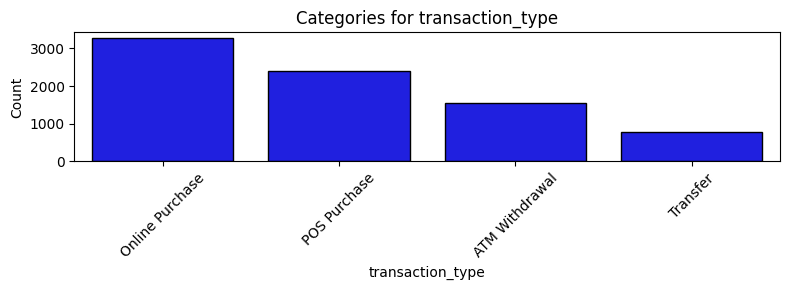

,count
device_type,
Mobile,3940
Desktop,3232
Tablet,828


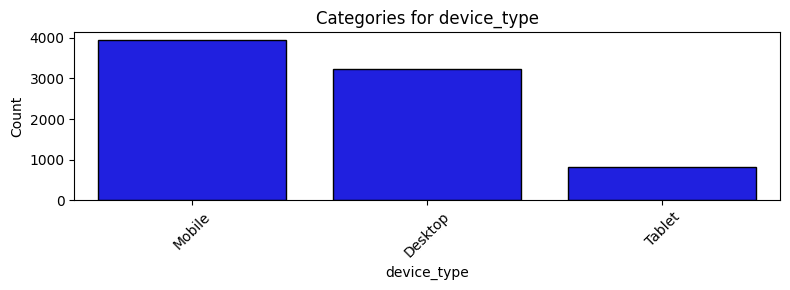

,count
location,
Urban,4836
Suburban,2396
Rural,768


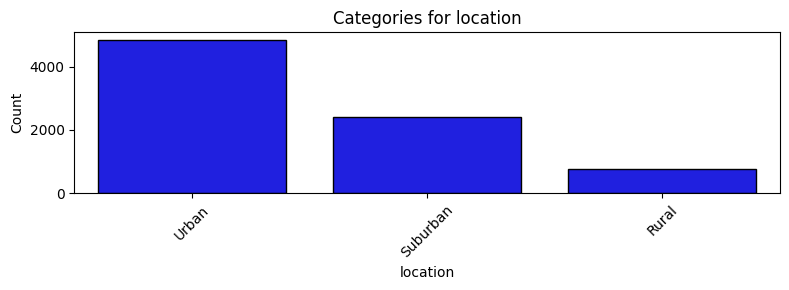

,count
merchant_category,
Travel,1757
Entertainment,1598
Food,1561
Electronics,1549
Clothing,1535


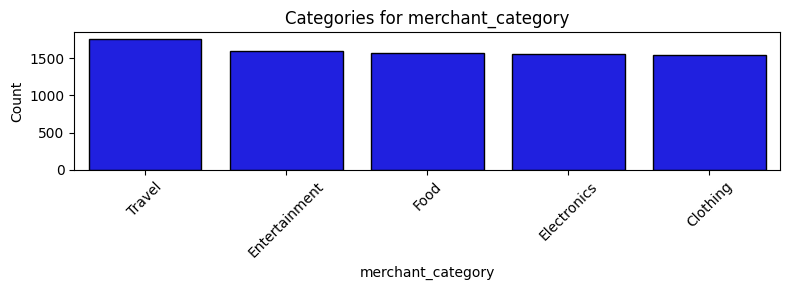

,count
is_international,
0,7172
1,828


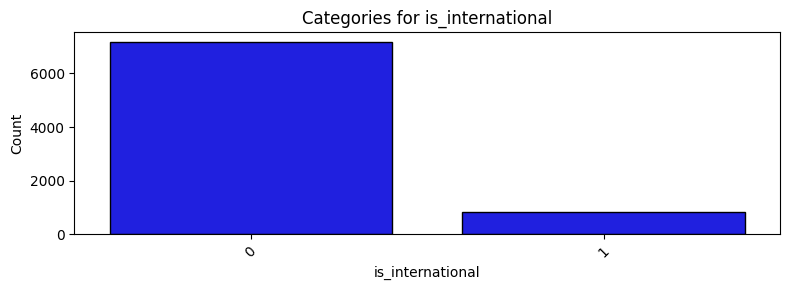

,count
is_high_risk_country,
0,7600
1,400


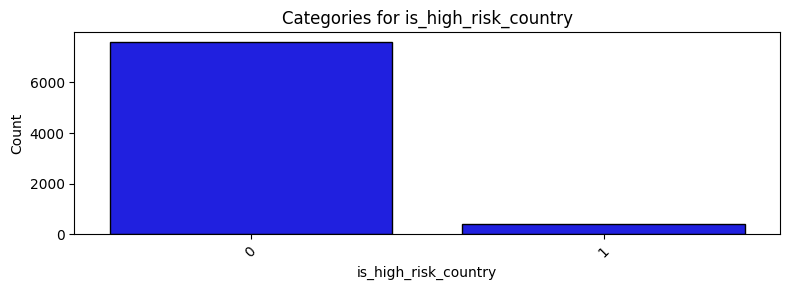

,count
failed_login_attempts,
1.0,1636
4.0,1629
0.0,1600
3.0,1573
2.0,1562


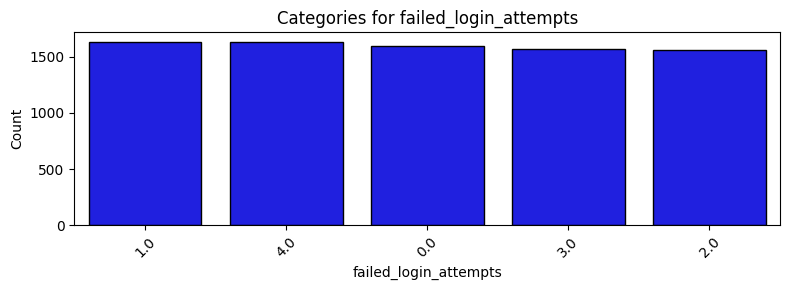

,count
card_present,
0,5648
1,2352


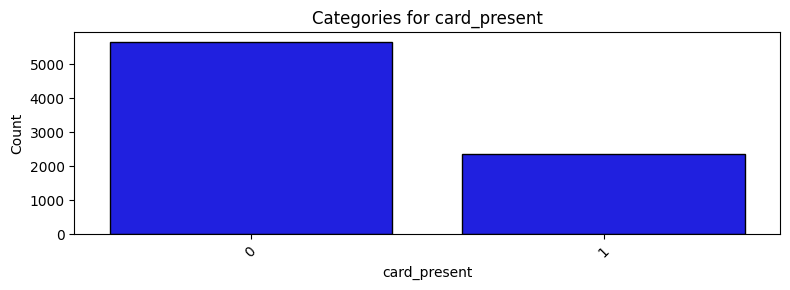

,count
fraud,
0,7604
1,396


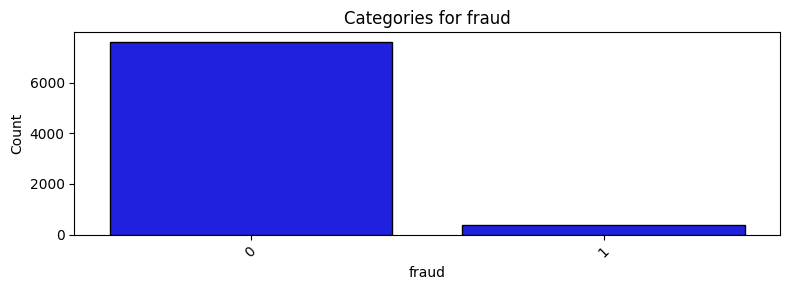

,count
year,
2023,8000


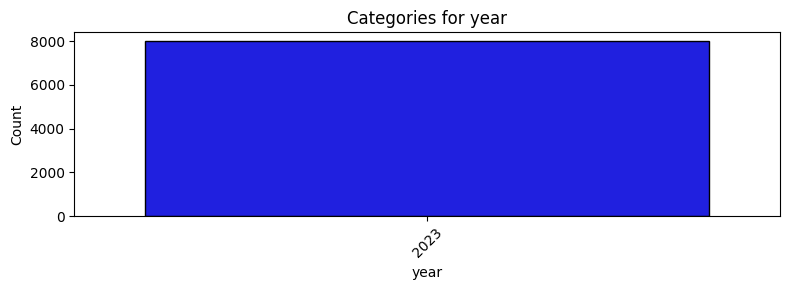

,count
month,
1,744
3,744
5,744
7,744
8,744
10,744
4,720
6,720
9,720


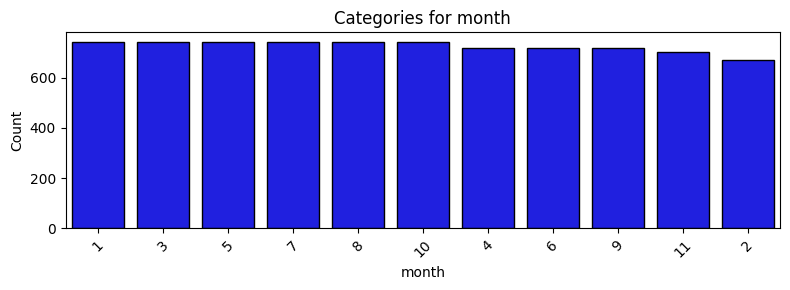

,count
day,
1,264
2,264
28,264
27,264
26,264
25,264
24,264
23,264
22,264


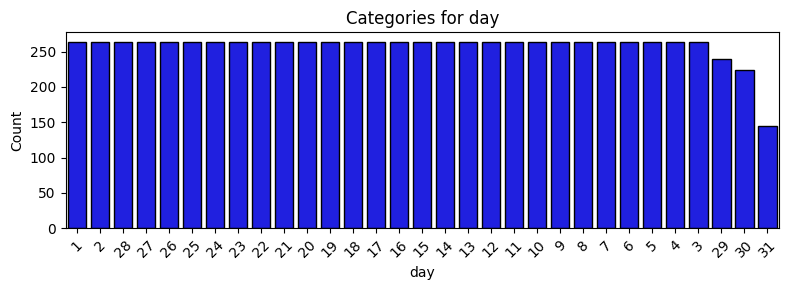

,count
hour,
0,334
2,334
3,334
4,334
5,334
6,334
7,334
1,334
16,333


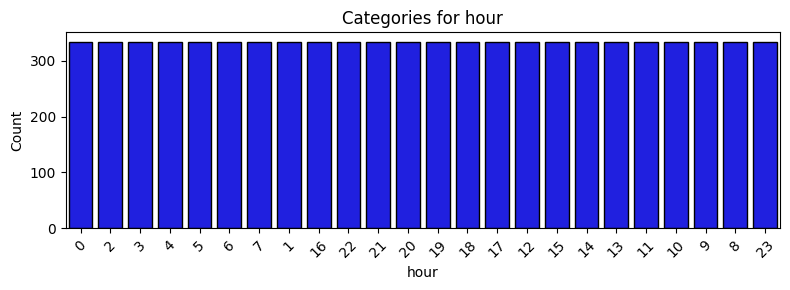

,count
weekday,
6,1152
0,1152
1,1152
2,1152
3,1136
4,1128
5,1128


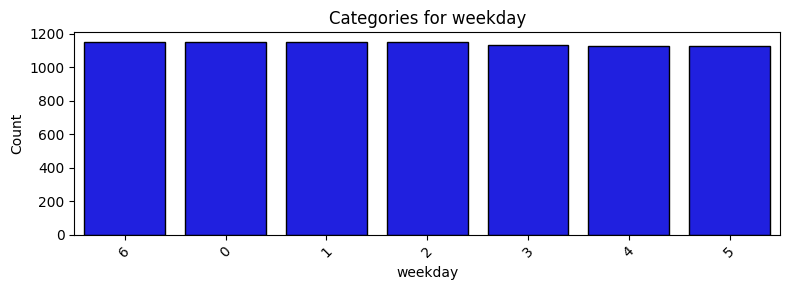

In [103]:
# Frequency counts and bar plots for categorical variables:

for feature in cat_cols:

    # Counts of Categories:
    categories = df[feature].value_counts()
    display(categories.to_frame(name= 'count'))

    # Bar Plot:
    plt.figure(figsize= (8,3))
    sns.barplot(x= categories.index.astype(str),
               y= categories.values,
               color= 'blue',
               edgecolor= 'black')
    plt.title(f'Categories for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation= 45)
    plt.tight_layout()
    plt.show()

Insights:

1) Fraud:
   - Fraud Data is Highly Imbalanced.
   - Non-Fraudulent Transactions: 7,604, Fraudulent Transactions (1): 396
   - This means only about 4.95% of the transactions in this dataset are fraudulent. This is a highly imbalanced dataset, which is a crucial consideration for any fraud detection modeling.


2) Transaction Type:
    - Online Purchases (3,262) are the most dominant transaction type, followed by POS Purchases (2,399). Transfers (795) are the least common.


3) Device Type:
    - Transactions are most frequently made on Mobile devices (3,940), with Desktops (3,232) being a close second. Tablets (828) are used far less often.


4) Location:
    - The majority of transactions originate from Urban areas (4,836), more than double the amount from Suburban areas (2,296). Rural transactions (768) are the least frequent.


5) Merchant Category:
    - The distribution across different merchant categories (Travel, Entertainment, Food, Electronics, Clothing) is surprisingly uniform and balanced, with each category having roughly 1,500-1,750 transactions. There is no single dominant spending category.


6) Card Present:
    - Most transactions are card-not-present (5,562) versus card-present (2,438). This aligns perfectly with "Online Purchase" being the most common transaction type.


7) International & High-Risk Country:
    - The dataset is heavily skewed towards domestic transactions. The vast majority of transactions are not international (is_international= 7,172) and not from a high-risk country (is_high_risk_country= 7,800). The rare instances where these are true could be strong indicators of fraud.


8) Failed Login Attempts:
    - The number of failed login attempts is distributed relatively evenly across 0, 1, 2, and 4 attempts. Unlike other risk features, there isn't a strong skew, suggesting that multiple login attempts are common in this dataset.


9) Year:
    - All data is from a single year, 2023.


10) Month:
    - The transaction count is very consistent across most months (around 700-750). The slight dip in February (month 2) is expected due to it having fewer days.


11) Day:
    - There's a clear and logical pattern here. Days 1 through 28 have a consistent count (264). The count then drops for days 29, 30, and 31, which correctly reflects that not all months have these days.


12) Hour & Weekday:
    - Both of these distributions are remarkably uniform. There are no obvious peaks or troughs for time of day or day of the week. This is unusual for financial data, which typically shows spikes during business hours or weekends. This uniformity might suggest the data is synthetic, has been sampled evenly, or represents a global user base operating across all time zones.